In [50]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
ZipFile("pd_nibrs_datasd.csv.zip").extractall()

In [3]:
df = pd.read_csv('pd_nibrs_datasd.csv', low_memory=False)

In [4]:
crimes_df = df.get(['case_number', 'occured_on', 'pd_offense_category', 'neighborhood', 'division', 'city', 'latitude', 'longitude'])

In [5]:
crimes_df = crimes_df[crimes_df['pd_offense_category'] != 'All Other Offenses']

In [6]:
crimes_df.head()

,case_number,occured_on,pd_offense_category,neighborhood,division,city,latitude,longitude
1,22701933,2022-02-11 22:00:00,Theft From Motor Vehicle,Mira Mesa,Northeastern,SAN DIEGO,32.901073,-117.120120
2,21020993,2021-05-02 06:00:00,Simple Assault,Midway District,Western,SAN DIEGO,32.754899,-117.206022
3,22041849,2022-09-21 12:46:21,Aggravated Assault,Unknown,Unknown,Mecca,NaN,NaN
4,21001415,2021-01-09 11:23:00,Stolen Property Offenses,Egger Highlands,Southern,CHULA VISTA,32.605965,-117.088752
5,23009256,2023-03-04 01:04:00,Motor Vehicle Theft,Rolando,Mid-City,SAN DIEGO,32.759579,-117.055797


In [44]:
nh = crimes_df.groupby('neighborhood').count().sort_values(by='case_number', ascending=False).rename(columns={'case_number':'Number of Crimes'})[0:5]

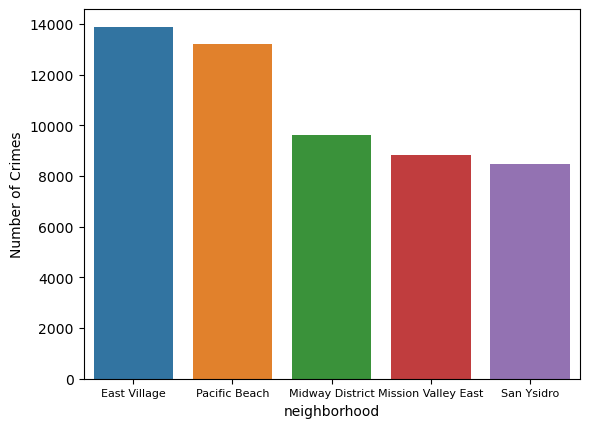

In [57]:
sns.barplot(data = nh, x = nh.index, y = 'Number of Crimes')
plt.xticks(fontsize=8) 
plt.show()